In [133]:
import cv2
from IPython.display import display, Markdown, Latex
from matplotlib import pyplot as plt
import numpy as np
import pdf2image

In [130]:
"""
Helper methods for displaying and converting PDF's and images
"""

def convert_pdf_to_image(document, dpi=300):
    """
    Coverts a PDF into a list of serializaled images (np arrays).
    """
    images = []
    images.extend(
                    list(
                        map(
                            lambda image: cv2.cvtColor(
                                np.asarray(image), code=cv2.COLOR_BGR2GRAY
                            ),
                            pdf2image.convert_from_path(document, dpi=dpi),
                        )
                    )
                )
    return images


"""
Helper methods for displaying openCV images in-line (in jupyter notebook). 
"""

def di(*args):
    """
    Display multiple images on one line. Quick and dirty, not a well written method. Useful for comparing images side-by-side. 
    """
    fig2 = plt.figure(figsize = (15,10))
    num_args = len(*args)
    imgs = args[0]
    if num_args == 1:
        plt.subplot(111)
        plt.imshow(imgs[0],cmap = 'gray')
        plt.show()
    elif num_args == 2:
        plt.subplot(121)
        plt.imshow(imgs[0],cmap = 'gray')
        plt.subplot(122)
        plt.imshow(imgs[1],cmap = 'gray')
        plt.show()
    else:
        #i.e. 3 images
        plt.subplot(131)
        plt.imshow(imgs[0],cmap = 'gray')
        plt.subplot(132)
        plt.imshow(imgs[1],cmap = 'gray')
        plt.subplot(133)
        plt.imshow(imgs[2],cmap = 'gray')
        plt.show()

def d1(im, h=15, w=15):
    """
    Display one image (useful for examining images in more detail)
    """
    fig1 = plt.figure(figsize = (h,w))
    plt.subplot(111)
    plt.imshow(im)
    plt.show()

In [131]:
def detect_footer(image):
    """
    Using open CV to detect horizontal (hough) lines in the page, demarcate the "footer" from the rest of the content in the page. 
    """
    # Load image, convert to grayscale, Otsu's threshold
    result = image.copy()
    thresh = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

    # Detect horizontal lines
    # see https://stackoverflow.com/questions/7227074/horizontal-line-detection-with-opencv
    horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (40,1))
    detect_horizontal = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, horizontal_kernel, iterations=2)
    horizontal_lines = cv2.findContours(detect_horizontal, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    horizontal_lines = horizontal_lines[0] if len(horizontal_lines) == 2 else horizontal_lines[1]
    for c in horizontal_lines:
        cv2.drawContours(result, [c], -1, (36,255,12), 2)

    # list of points defining the footer line. The list of points are not all on the same line (due to noise), 
    # hence we need to get the average of the y coordinates to "mark" where the footer is
    footer_points = []
    for points in horizontal_lines:
        for point in points:
            footer_points.append(point[0][1])        
    footer_line = int(sum(footer_points)/len(footer_points))
    


    height, width = image.shape
    
    # display the image with the footnote line demarcated
    temp = image.copy()
    thickness = int(footer_line*0.0028)
    cv2.line(temp,(0,footer_line),(width,footer_line),(0,0,0),thickness)
    d1(temp)
    
    # split the image at the footer
    # the rest of the page without the footnotes
    content = image[0:footer_line, 0:width]
    # the actual footnotes
    footnotes = image[footer_line:height, 0:width]    
    di((content, footnotes))  

### Detecting the footers of pages 153 - 164 of Harihara's Ragaḷegaḷu

In [106]:
file = 'harihara/10pages.pdf'
ten_pages = convert_pdf_to_image(file, 300)

##### Pg.153

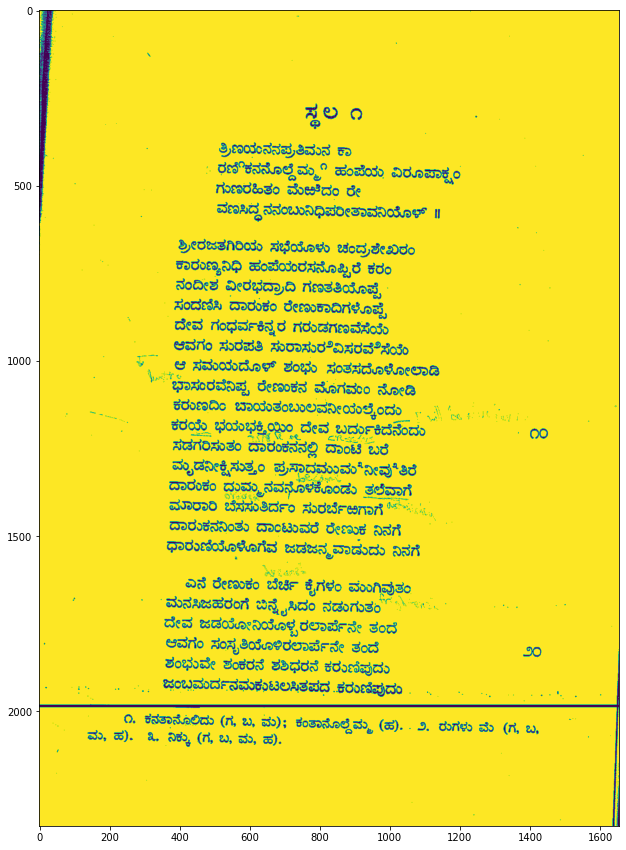

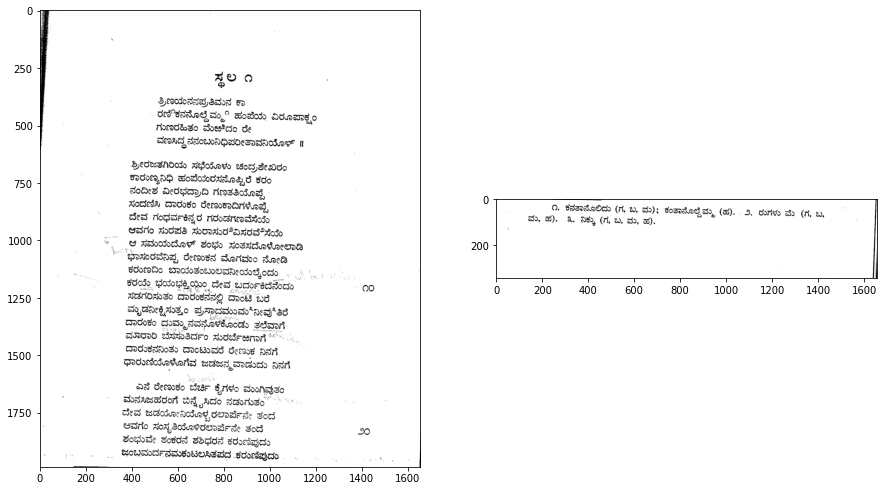

##### Pg.154

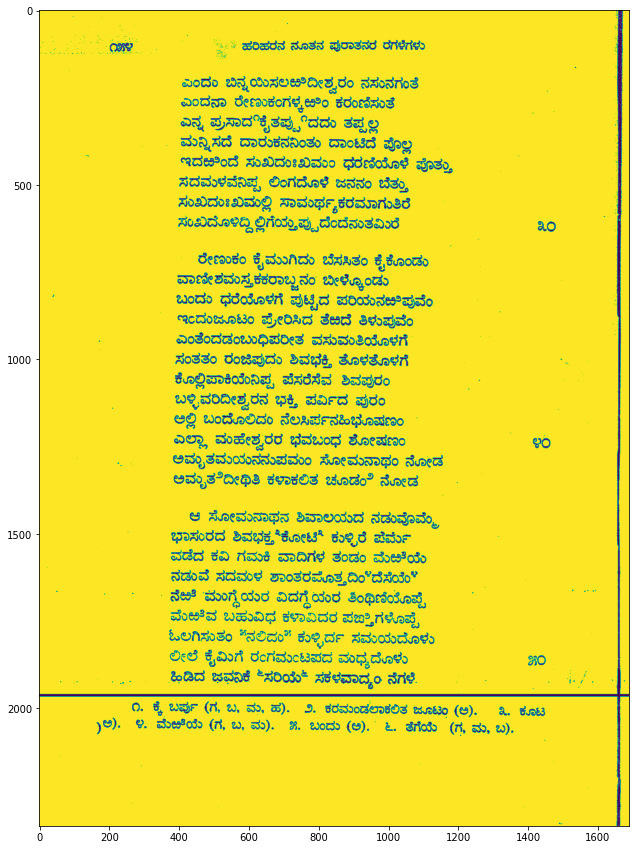

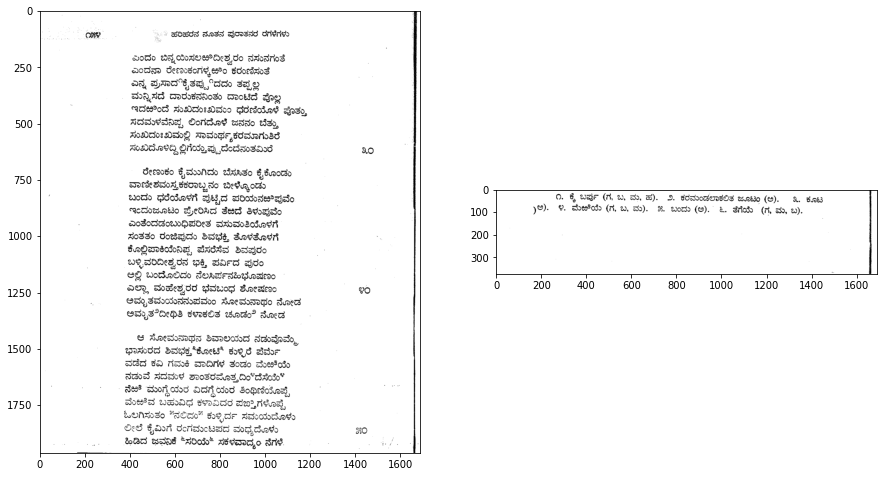

##### Pg.155

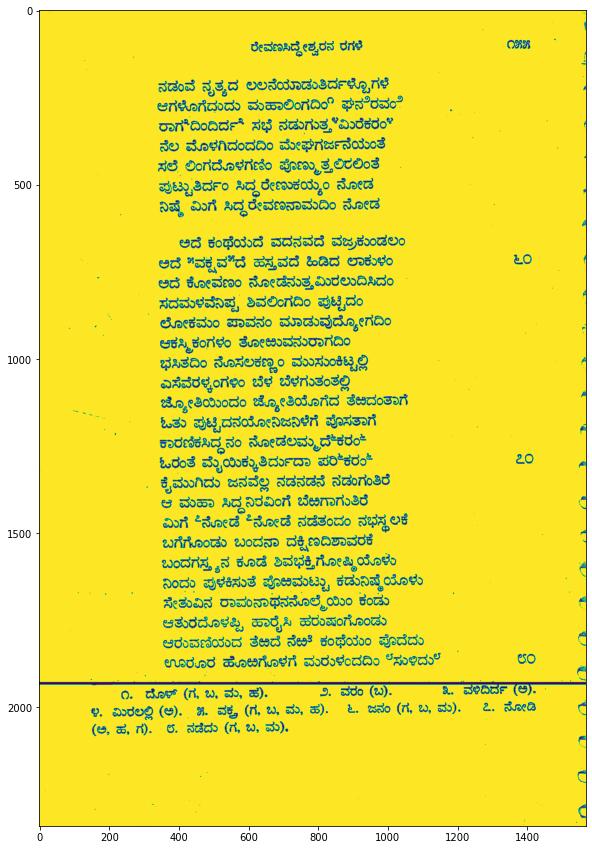

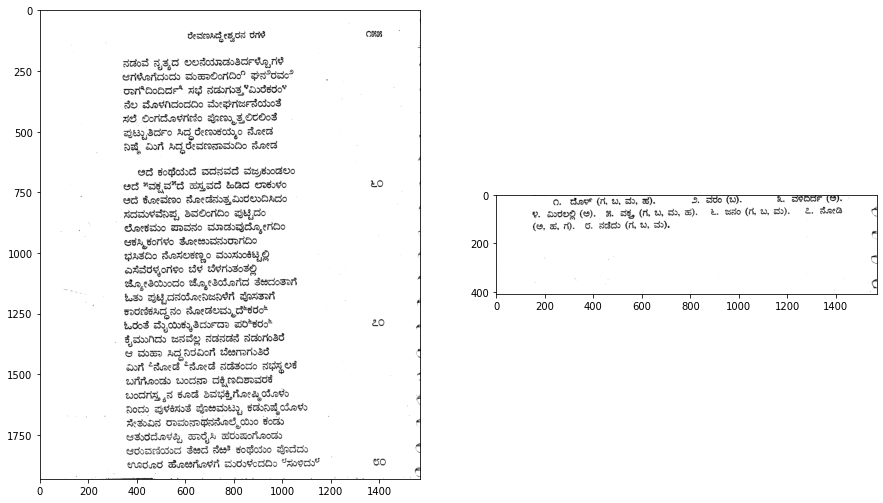

##### Pg.156

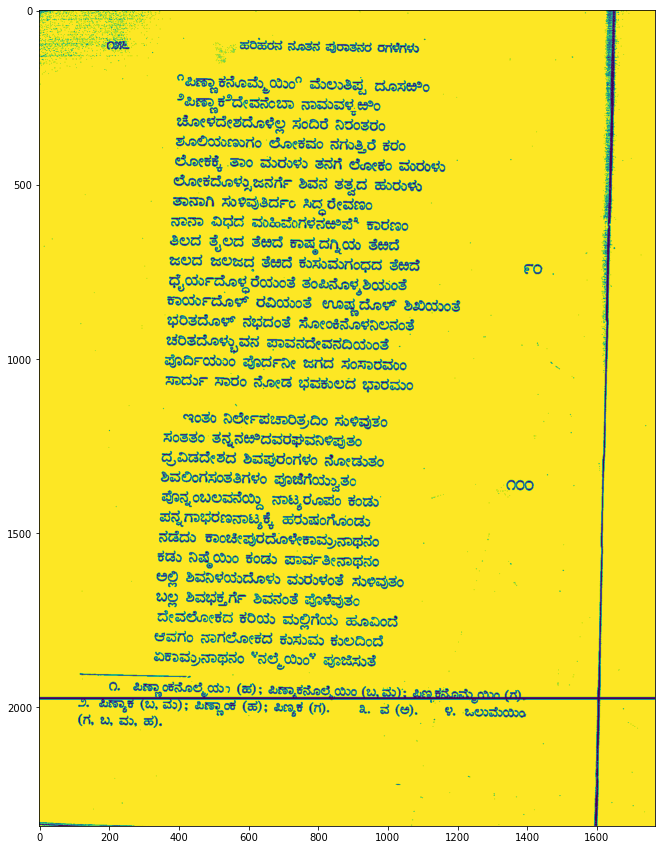

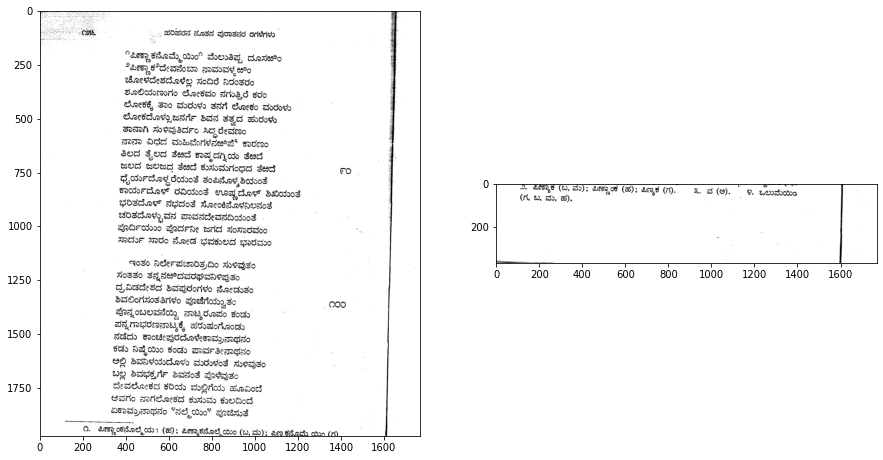

##### Pg.157

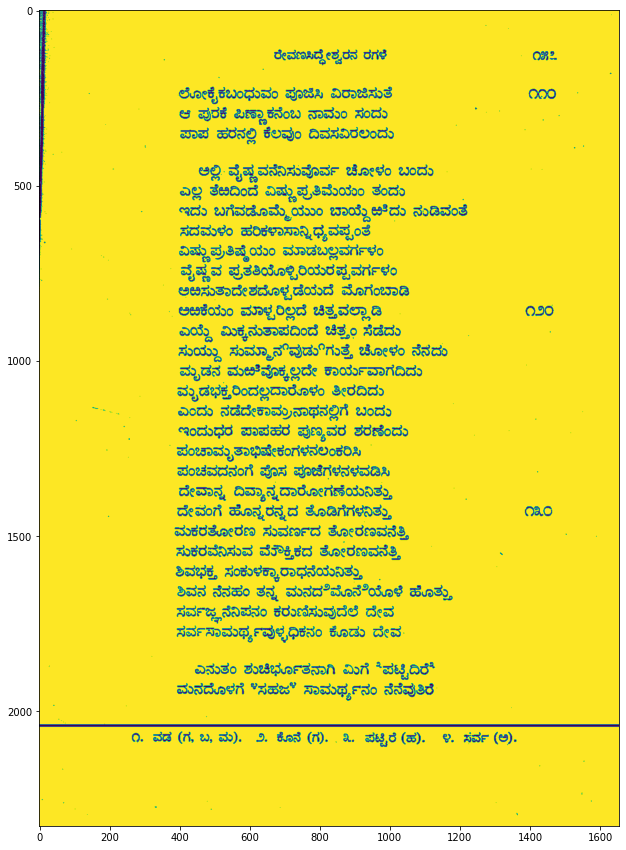

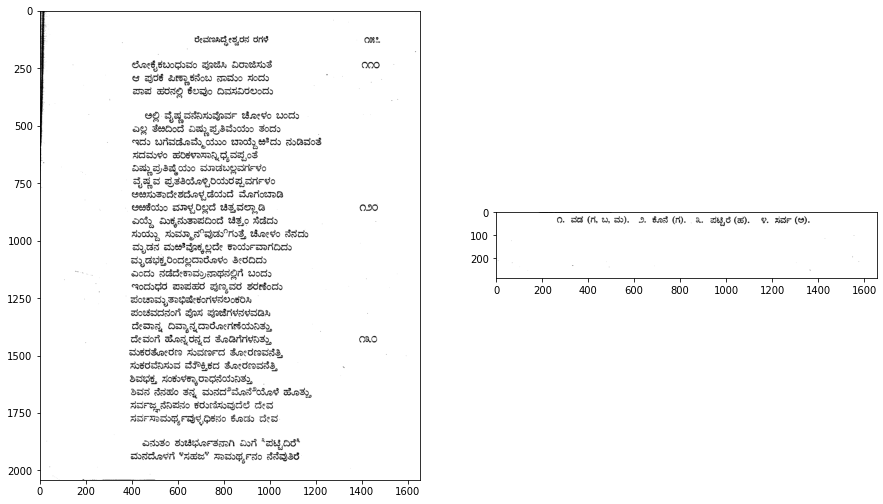

##### Pg.158

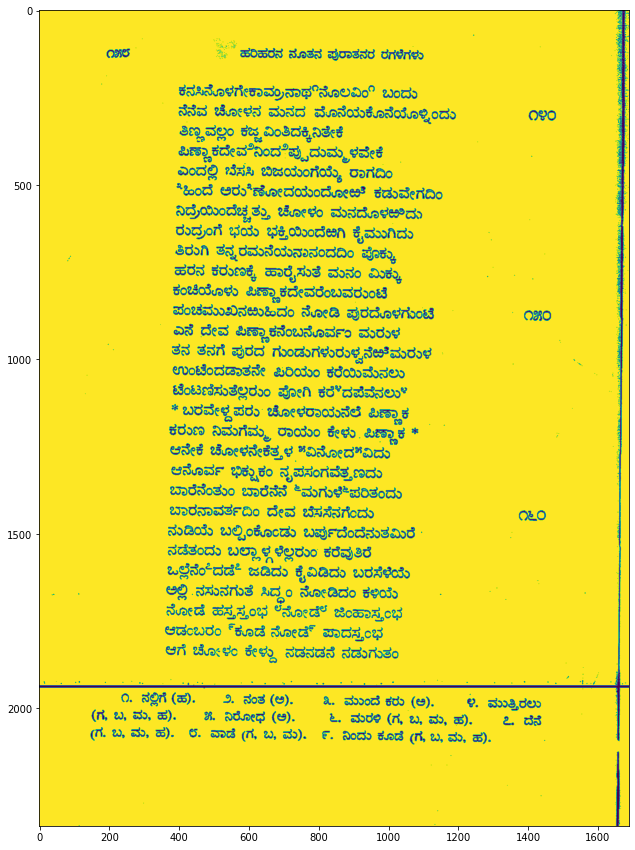

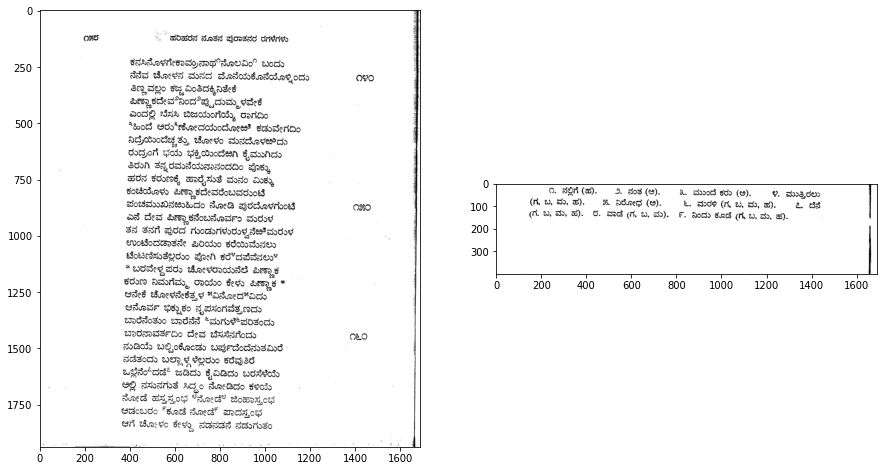

##### Pg.159

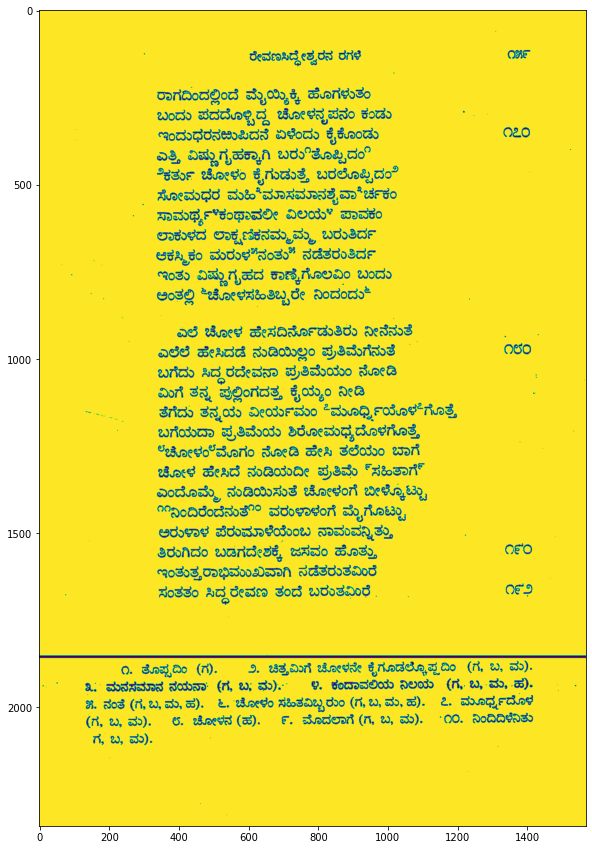

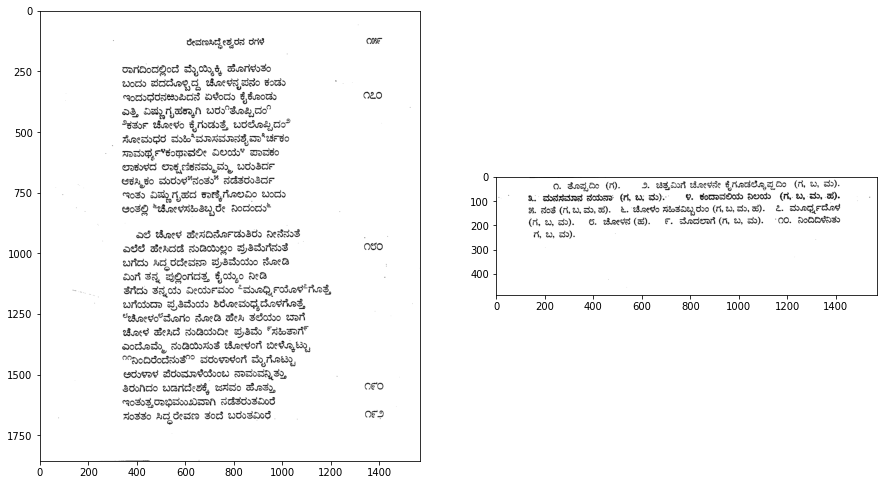

##### Pg.160

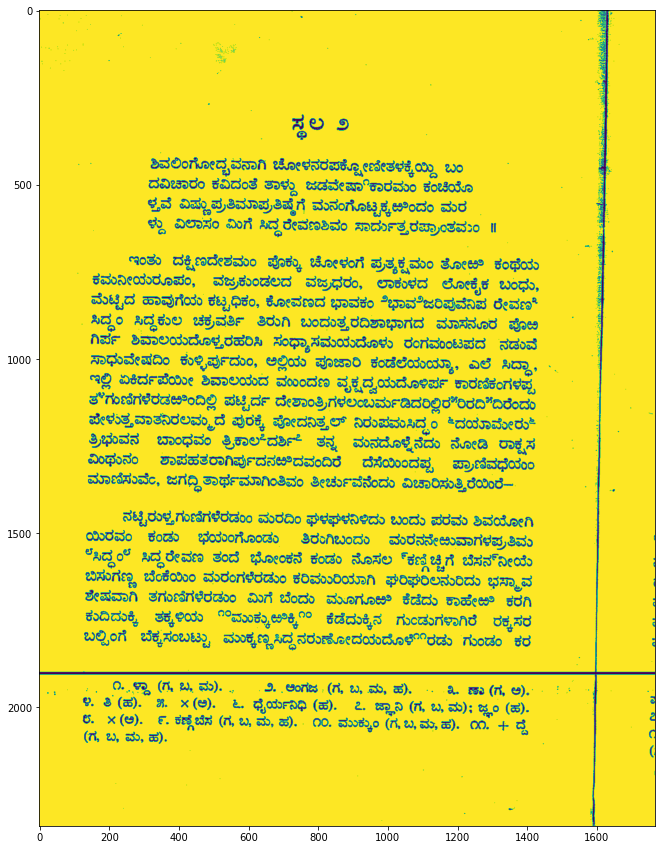

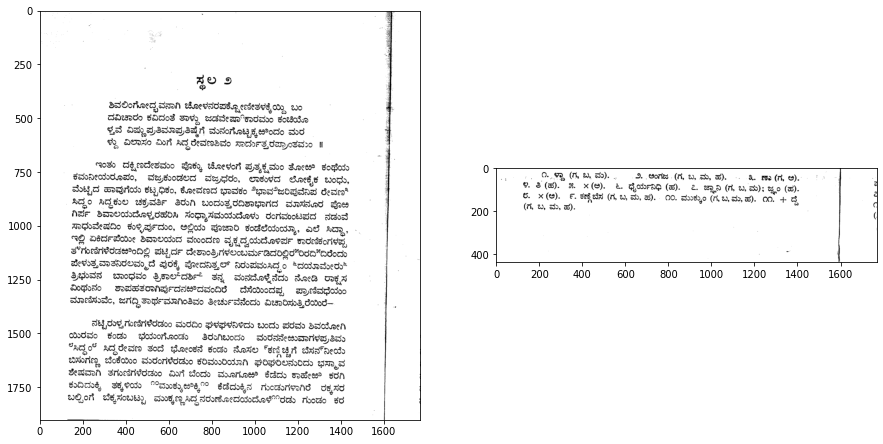

##### Pg.161

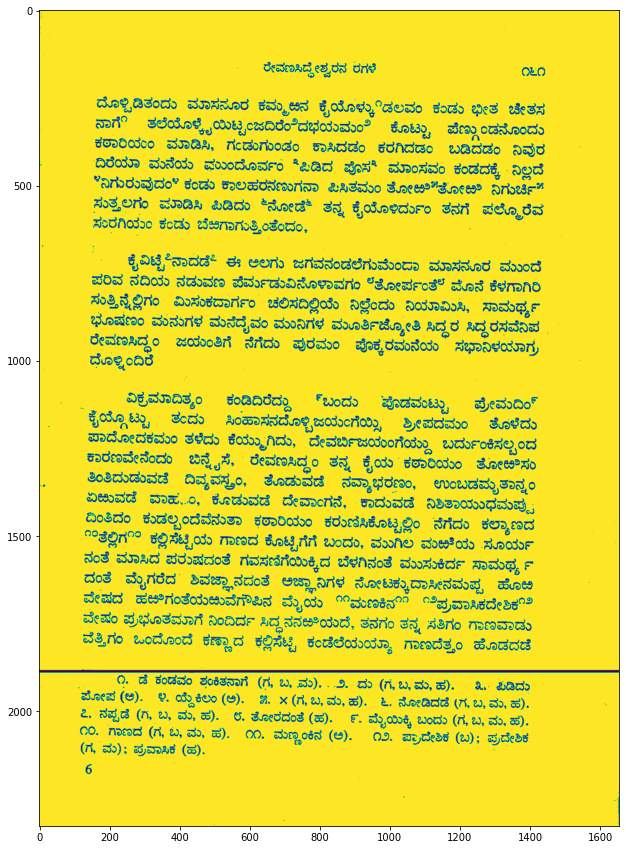

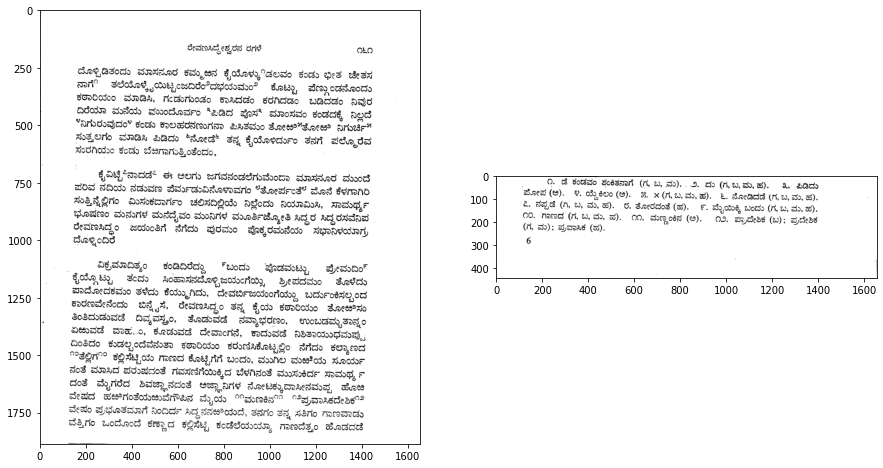

##### Pg.162

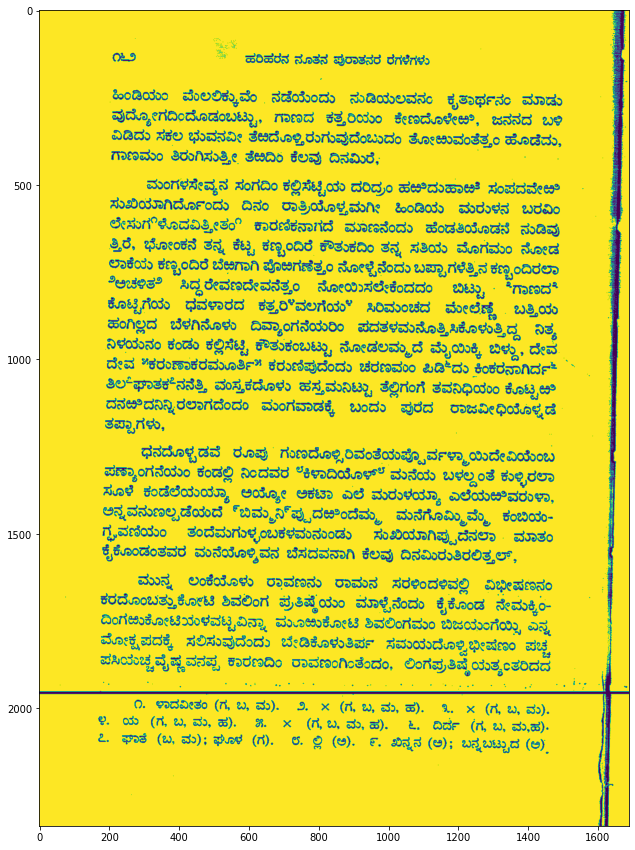

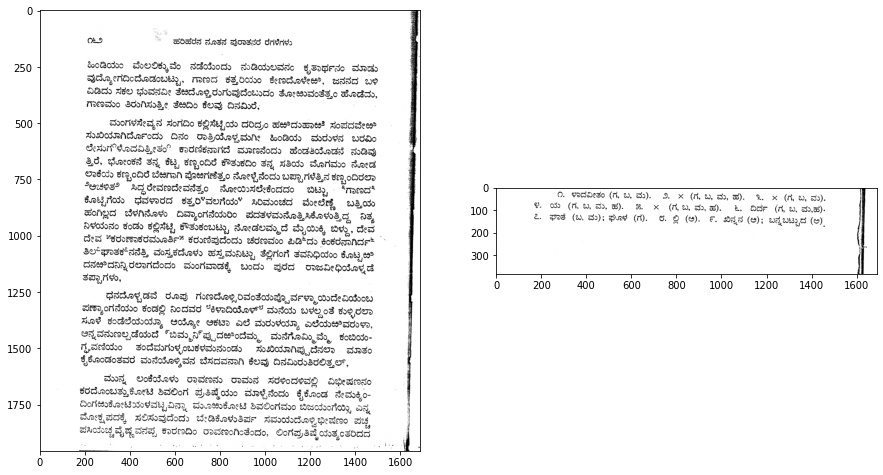

##### Pg.163

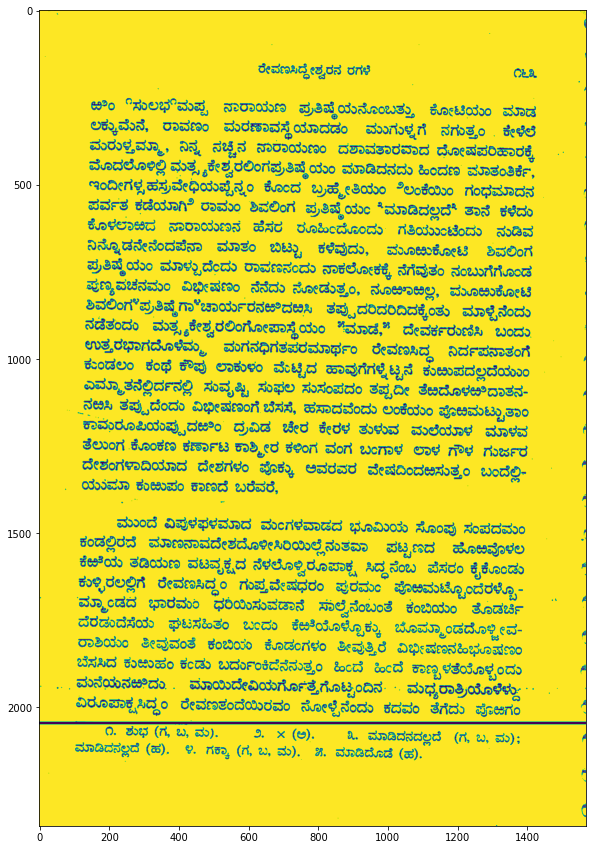

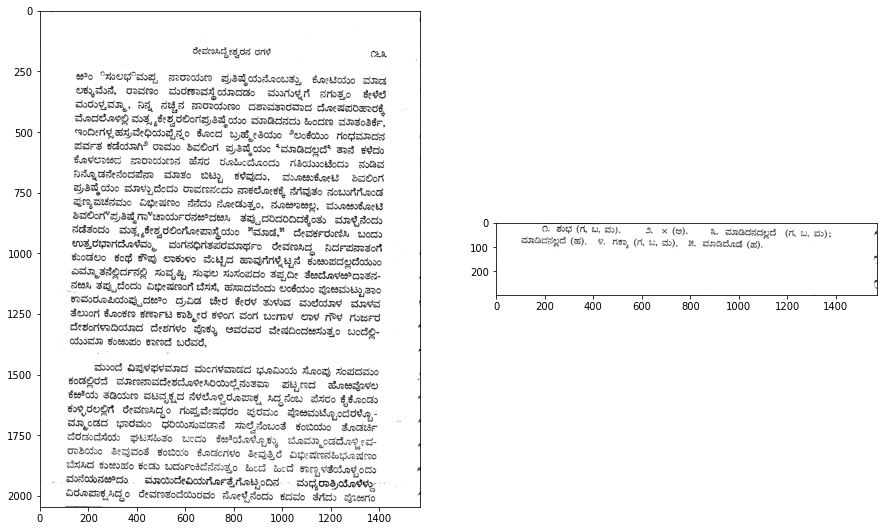

##### Pg.164

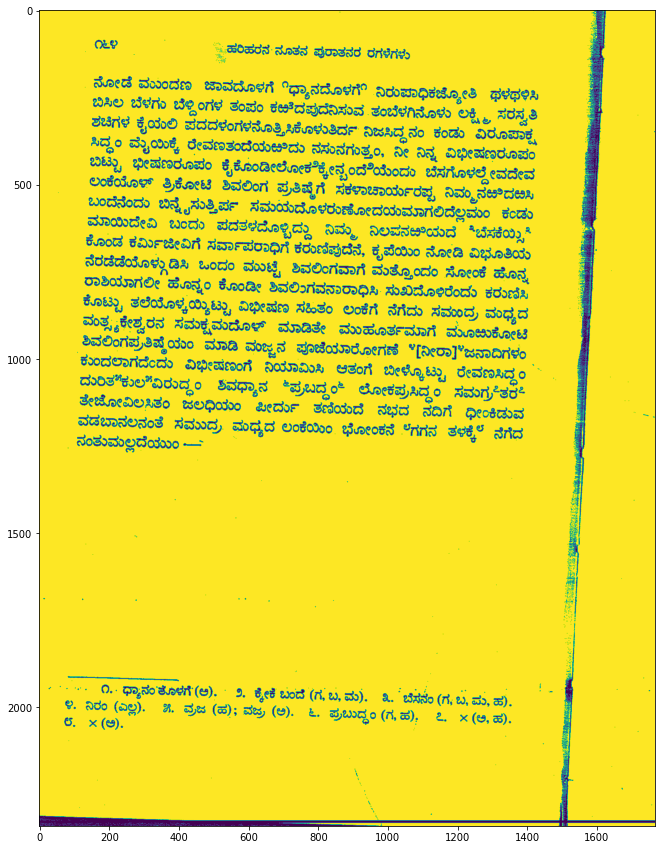

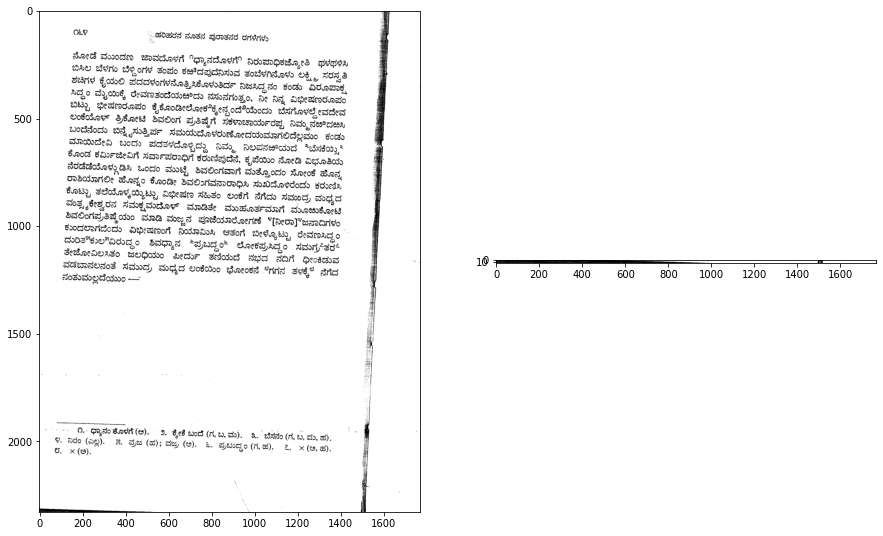

In [136]:
for i, img in enumerate(ten_pages):
    display(Markdown(f'##### pg.{i+153}'))
    detect_footer(img)